# Creating our own Simple Linear Regression class

In [108]:
import pandas as pd
import numpy as np

In [109]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [110]:
from sklearn.model_selection import train_test_split

In [117]:
X = df.iloc[:,0].values
y = df['package'].values

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [120]:
class Custom_lr:
    def __init__(self):
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        numerator = 0
        denominator = 0
        
        for i in range(X_train.shape[0]):
            
            numerator = numerator + ((X_train[i] - X_train.mean())*(y_train[i] - y_train.mean()))
            denominator = denominator + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))
            
            self.m = numerator/denominator
            self.b = y_train.mean() - (self.m*X_train.mean())
    def predict(self,X_test):
        
        return ((self.m*X_test) + self.b)

In [121]:
lr = Custom_lr()

In [122]:
lr.fit(X_train,y_train)

In [127]:
lr.predict(X_test[0])

2.799946460502512

In [147]:
Custom_pred = lr.predict(X_test)

In [142]:
print(lr.m)
print(lr.b)

0.5776036483690932
-1.0295657281845756


In [131]:
X_train.shape

(134,)

In [138]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sklearn_lr.fit(X_train.reshape(134,1),y_train)
sklearn_lr.predict(X_test[0].reshape(1,1))

array([2.79994646])

In [146]:
sklearn_pred = sklearn_lr.predict(X_test.reshape(66,1))

In [140]:
print(sklearn_lr.coef_)
print(sklearn_lr.intercept_)

[0.57760365]
-1.0295657281845783


We can see both the custom_lr class and sklearn's Linear regression Gave same result 

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sklearn Linear Regression')

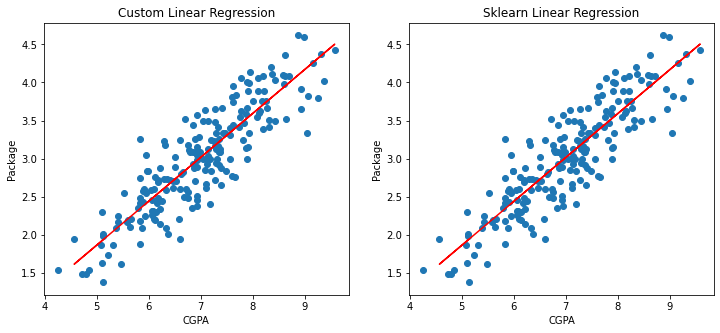

In [158]:
plt.figure(figsize=(12 ,5 ))
plt.subplot(1,2,1)
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Custom Linear Regression')
plt.subplot(1,2,2)
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,sklearn_lr.predict(X_train.reshape(134,1)),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package')
plt.title('Sklearn Linear Regression')